In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [14]:
m_df = pd.read_csv("data.csv")

m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   bpressure    768 non-null    int64  
 3   skinfold     768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   pedigree     768 non-null    float64
 7   age          768 non-null    int64  
 8   class        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
m_df.head()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Figure size 3600x2520 with 0 Axes>

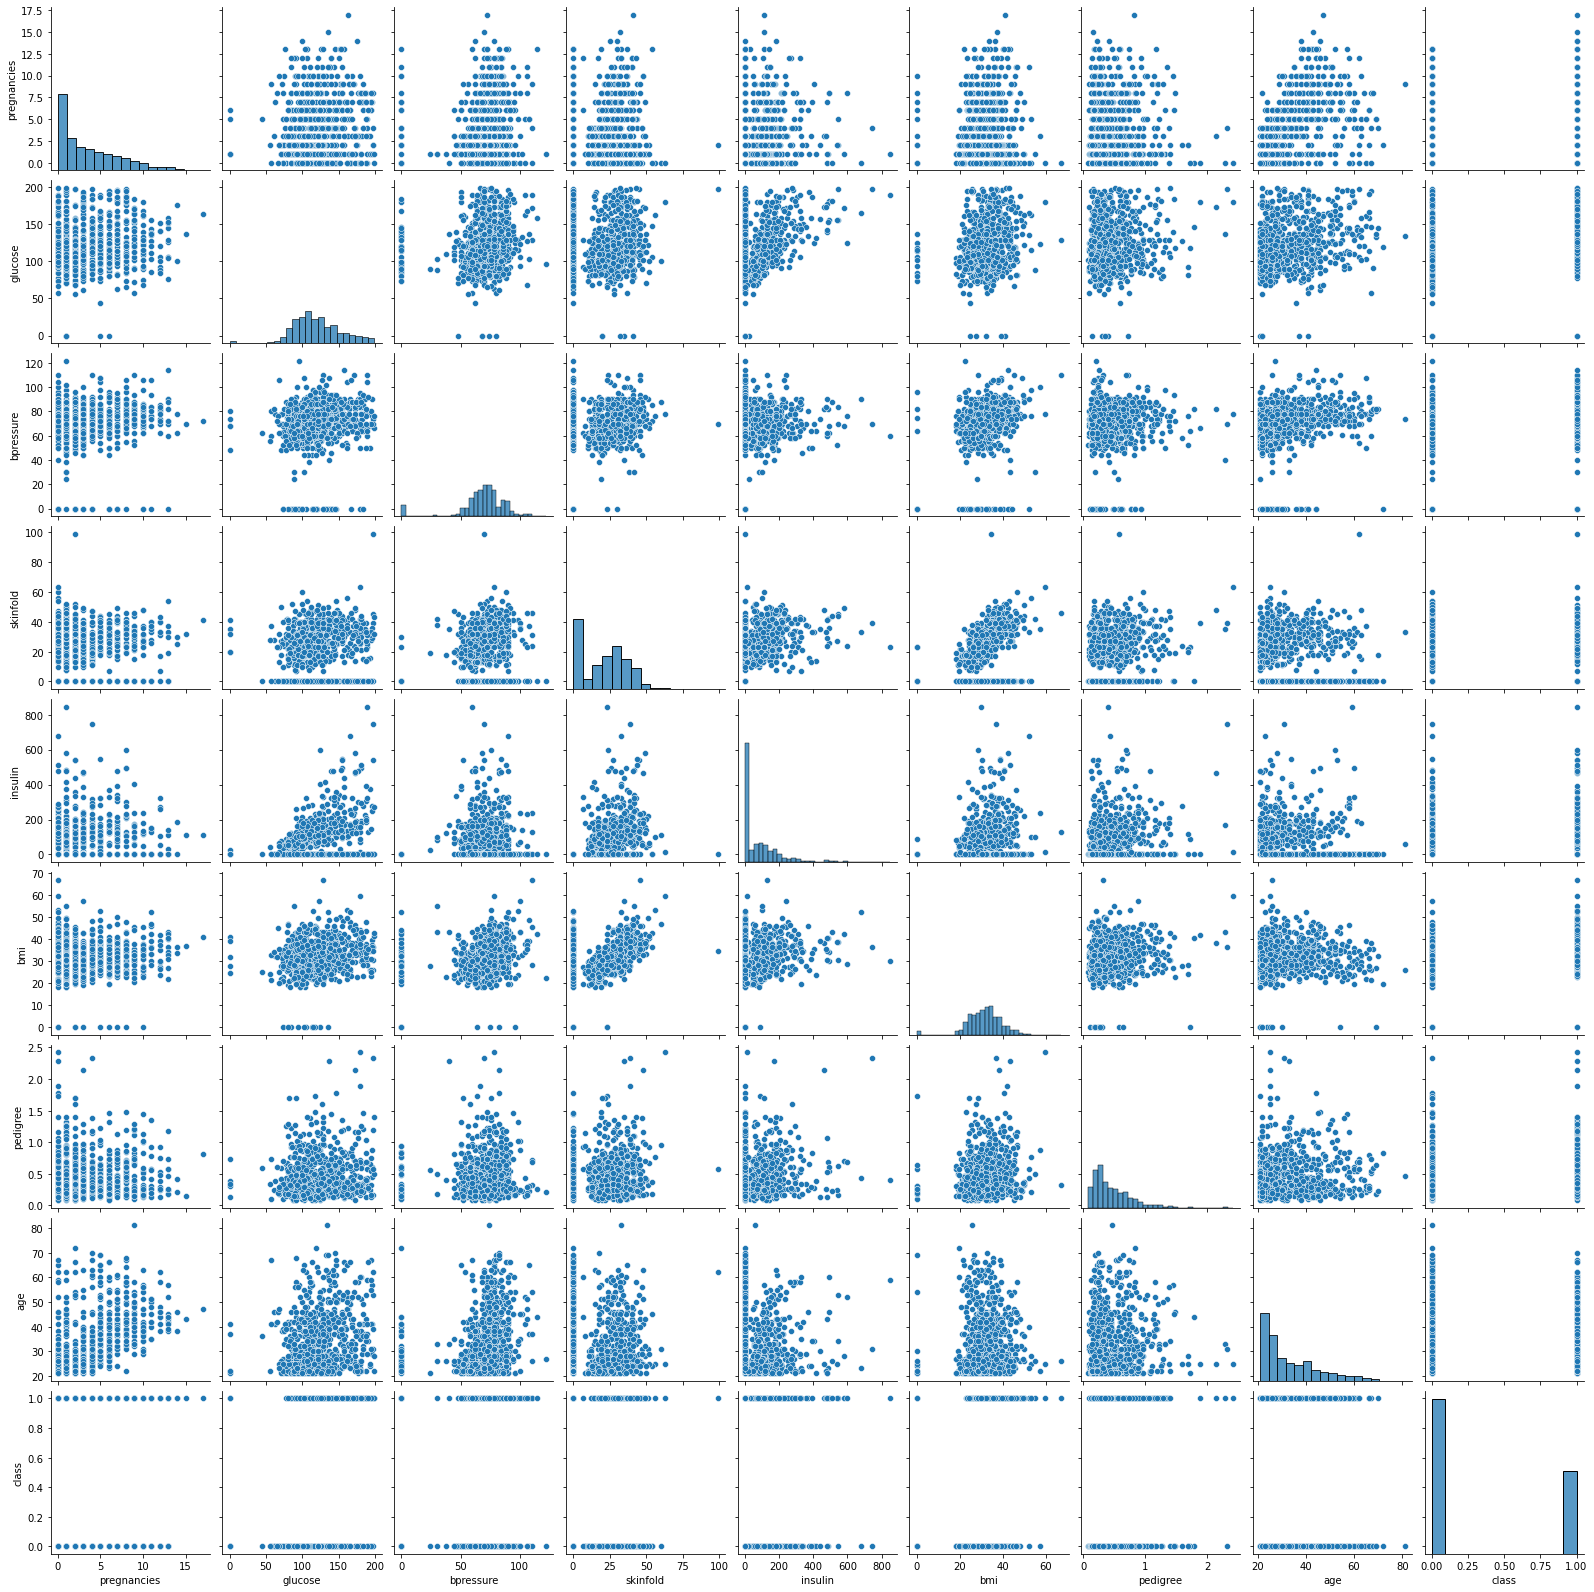

In [16]:
plt.figure(figsize=(50,35))

sns.pairplot(m_df)

<AxesSubplot:>

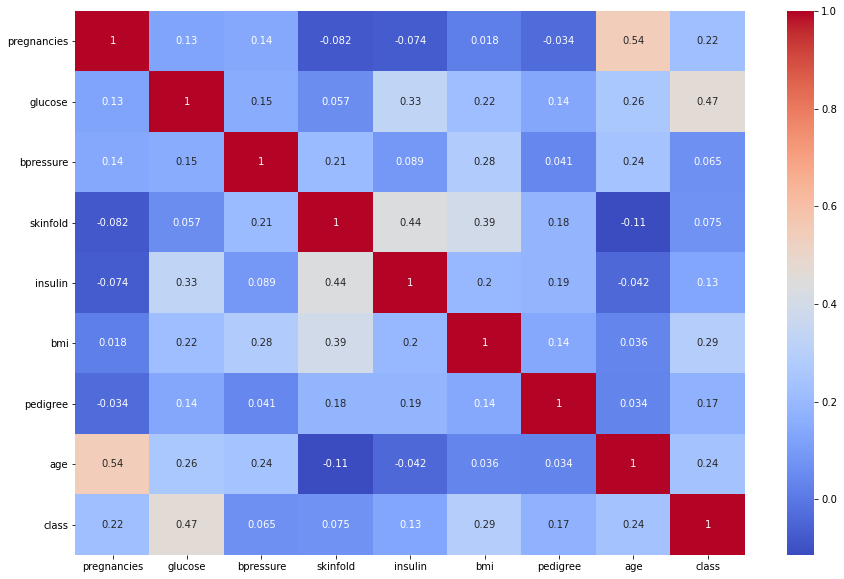

In [17]:
plt.figure(figsize=(15,10))

sns.heatmap(m_df.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='pregnancies', ylabel='age'>

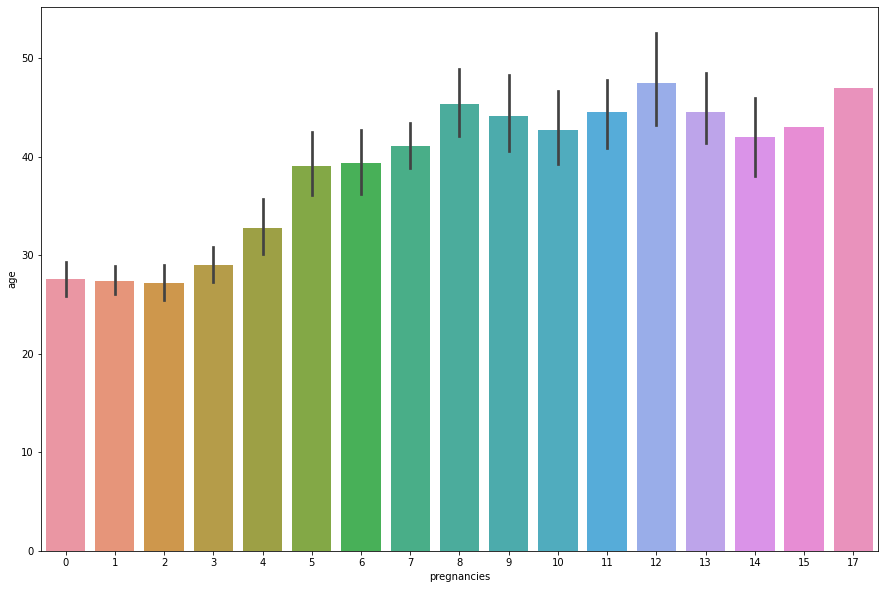

In [18]:
plt.figure(figsize=(15,10))


sns.barplot(x='pregnancies',y='age',data=m_df)

<AxesSubplot:xlabel='glucose', ylabel='class'>

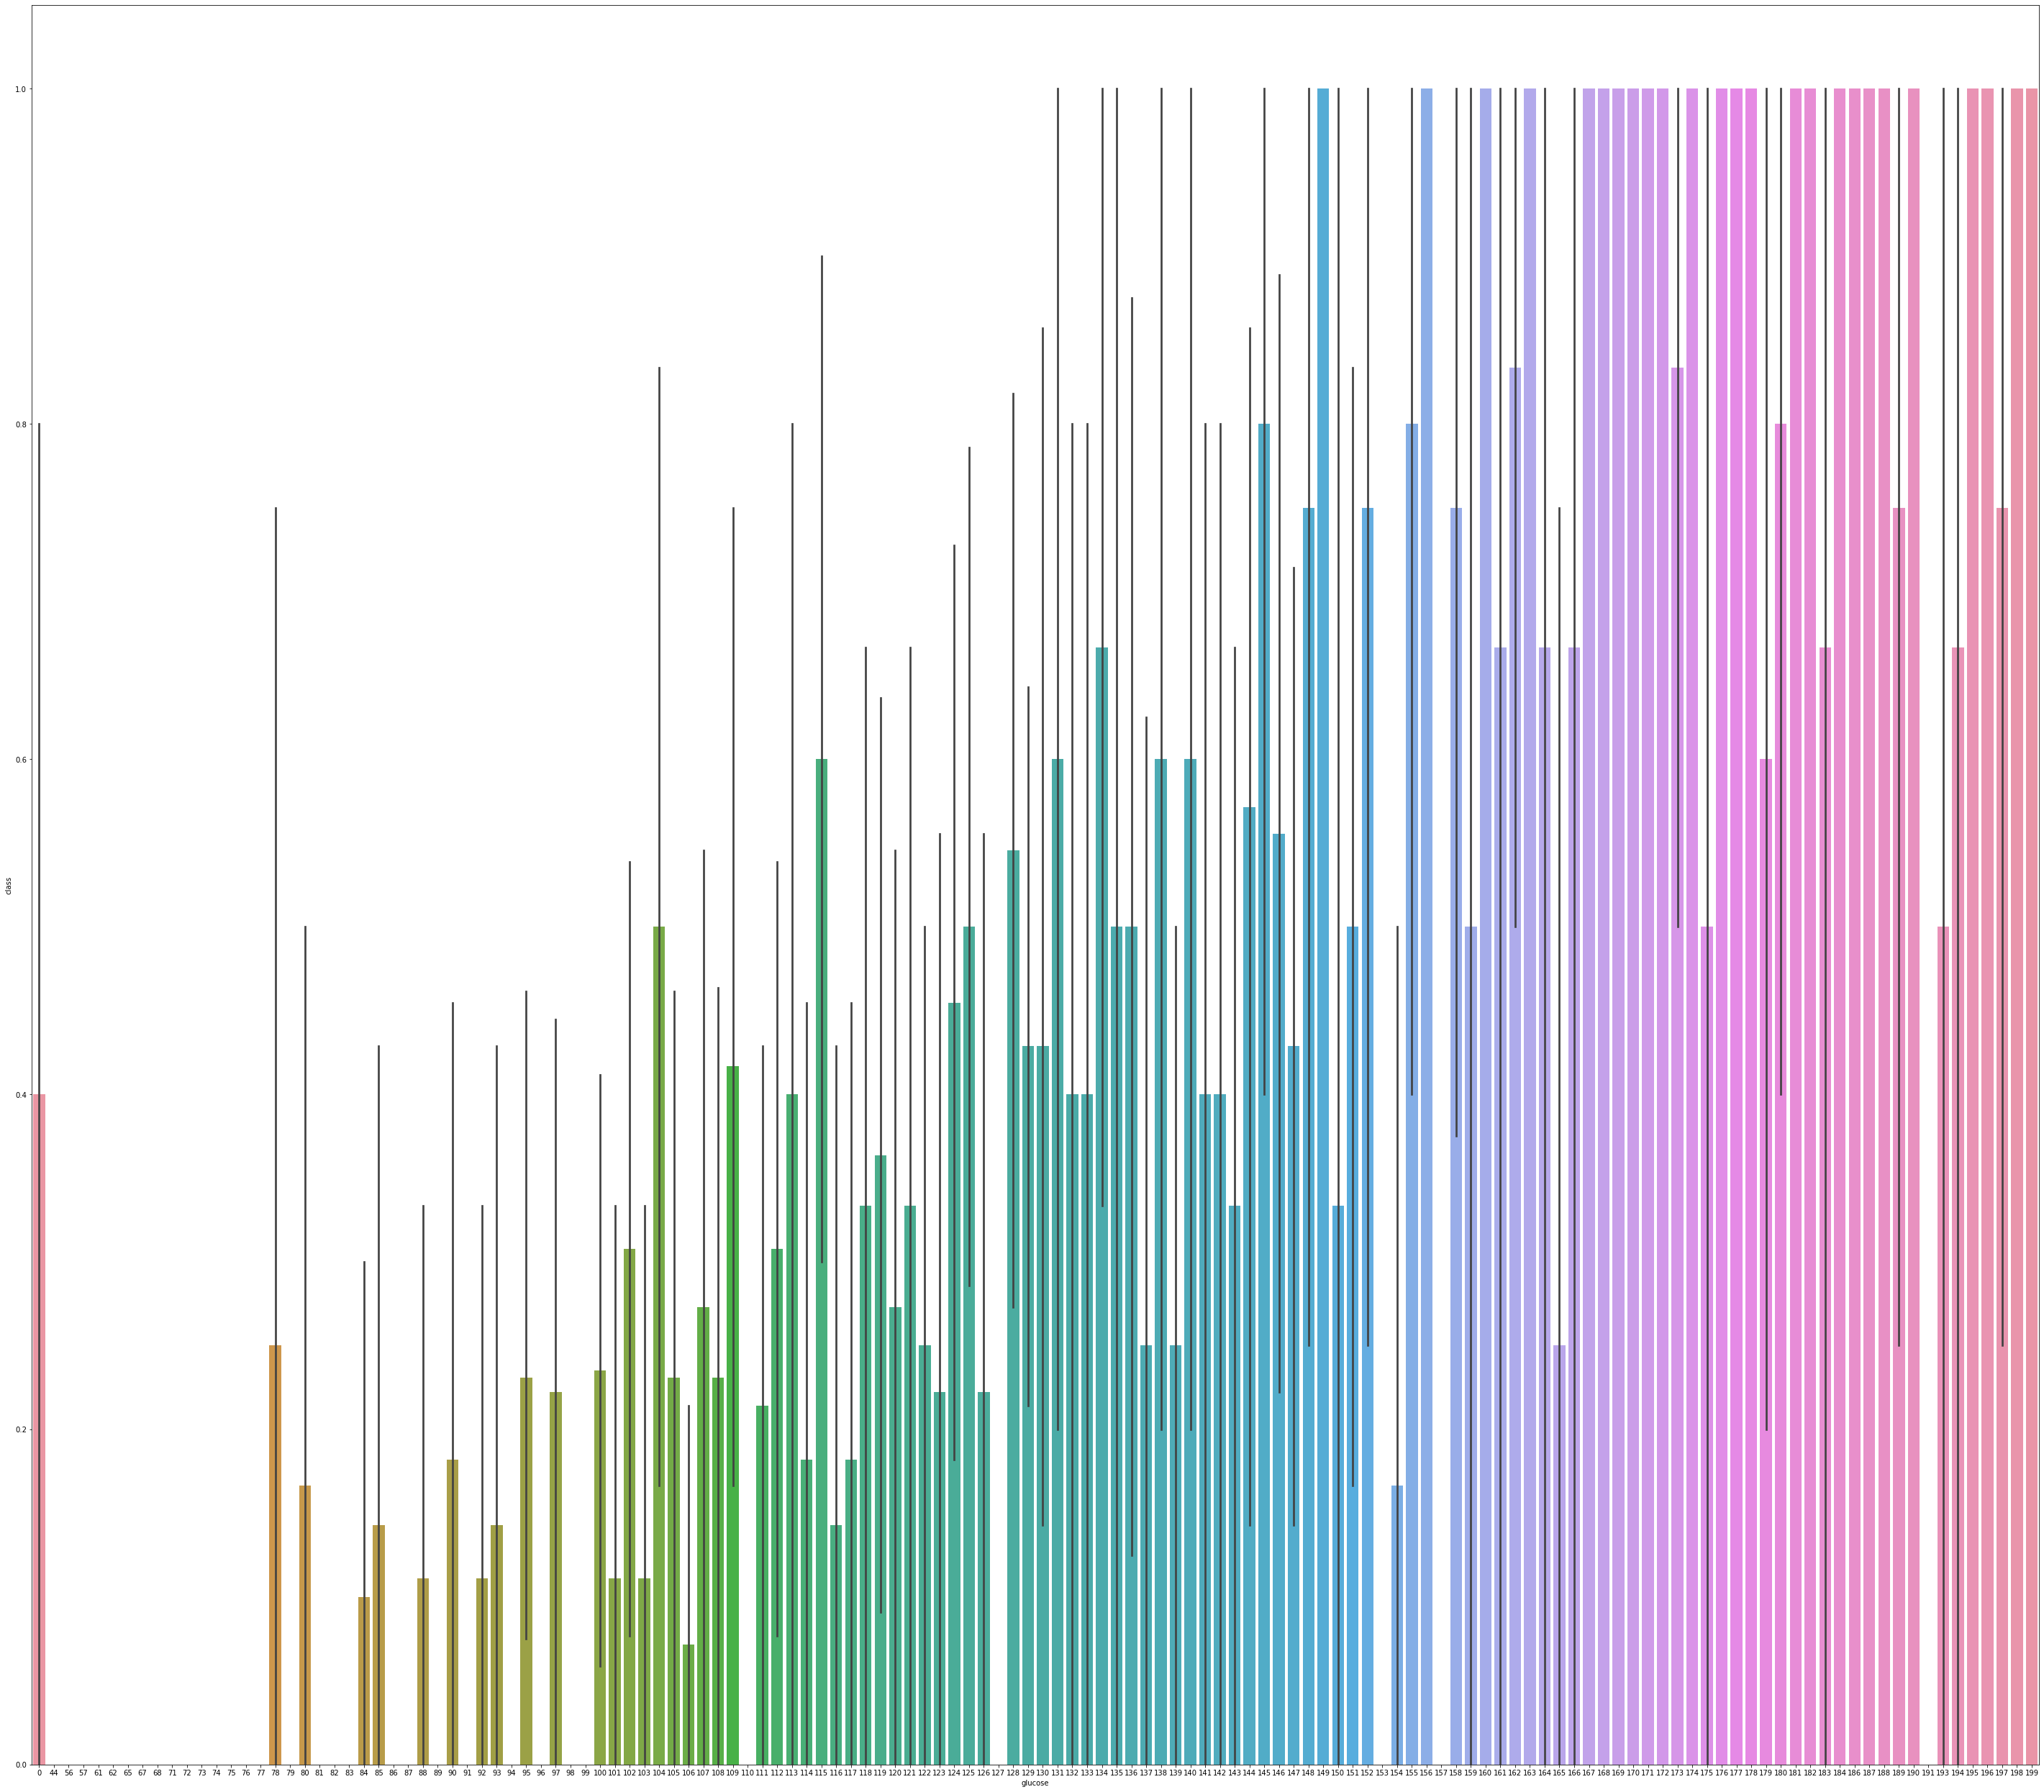

In [19]:
plt.figure(figsize=(50,45))

sns.barplot(x='glucose',y='class',data=m_df)

In [21]:
x=m_df.iloc[:,:10]

In [23]:
y=m_df['class']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [25]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)

In [26]:
clf=svm.SVC(kernel='sigmoid')
clf.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [27]:
y_pred=clf.predict(x_train)
print(accuracy_score(y_train,y_pred))

0.9791666666666666


In [28]:
for k in ('linear','poly','rbf','sigmoid'):
    clf=svm.SVC(kernel=k)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_train)
    print(k)
    print(accuracy_score(y_train,y_pred))

linear
1.0
poly
1.0
rbf
1.0
sigmoid
0.9791666666666666


In [29]:
clf=svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)

SVC()

In [32]:
x_test = sc.transform(x_test)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9895833333333334


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.99      0.99      0.99        68

    accuracy                           0.99       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



In [34]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=9)

# Train the model using the training sets
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=9)

In [35]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9947916666666666


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf']}  
  
grid = GridSearchCV(clf, param_grid) 
  
# fitting the model for grid search 
grid.fit(x_train,y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00        68

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

